## Increase dimension with aspect image crop.

This function will enlarge considering the minimum/height-width ratio with exception handling so that the desired image cover the image you want

In [34]:
from PIL import Image
import cv2
import math

def resizeGlandImage(image, x, y):
    # image  = Image.open(name)
    image = Image.fromarray(image)
    
    width, height = image.size
    
    if x*height>y*width:
        dimention = (x, math.ceil(height*x/width))
        offsetx, offsety = 0, ((math.ceil(height*x/width)-y)/2)
    else:
        dimention = (math.ceil(width*y/height), y)
        offsetx, offsety = ((math.ceil(width*y/height)-x)/2), 0
        
    AspectImage = image.resize(dimention, Image.BICUBIC)
    CropedImage = AspectImage.crop((offsetx,offsety,x+offsetx,y+offsety))
    return CropedImage;
    #thumb.save(savename)

This is the function to make grayscale if needed to convert from multi chanel image to 2D image

In [35]:
import cv2
def ifRGBthenGray(img):
    #To find the no of Chanel go with len(img.shape)
    imggr = img
    if(len(img.shape)==3):
        imggr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return imggr

### Running the program for each images in the folder

PICOLO_PRO2_001461 - 20151022-090633.jpg is 2 dimentional (1626, 1236) image
PICOLO_PRO2_001461 - 20151022-090714.jpg is 2 dimentional (1626, 1236) image
PICOLO_PRO2_001461 - 20151022-090735.jpg is 2 dimentional (1626, 1236) image
PICOLO_PRO2_001461 - 20151022-090809.jpg is 2 dimentional (1626, 1236) image
PICOLO_PRO2_001461 - 20151105-100750.jpg is 2 dimentional (1626, 1236) image
PICOLO_PRO2_001461 - 20151105-100820.jpg is 2 dimentional (1626, 1236) image
PICOLO_PRO2_001461 - 20151105-100849.jpg is 2 dimentional (1626, 1236) image
PICOLO_PRO2_001461 - 20151105-100917.jpg is 2 dimentional (1626, 1236) image
PICOLO_PRO2_001461 - 20151119-114119.jpg is 2 dimentional (1626, 1236) image
PICOLO_PRO2_001461 - 20151119-114255.jpg is 2 dimentional (1626, 1236) image
PICOLO_PRO2_001461 - 20151119-114319.jpg is 2 dimentional (1626, 1236) image
PICOLO_PRO2_001461 - 20151119-114443.jpg is 2 dimentional (1626, 1236) image
PICOLO_PRO2_001461 - 20151222-151945.jpg is 2 dimentional (1626, 1236) image

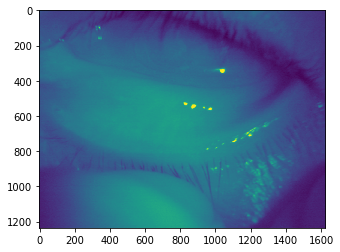

In [42]:
import cv2
import matplotlib.pyplot as mpimage

from PIL import Image
import glob
image_list = []
for filename in glob.glob('*.bmp'): #assuming gif
    img = mpimage.imread(filename)
    crop = resizeGlandImage(img, 1626, 1236)
    crop.save(filename.replace(".bmp", ".jpg"))
    mpimage.imshow(crop)
    print(f"{(filename.replace('.bmp', '.jpg'))} is {len(crop.size)} dimentional {crop.size} image")
    